In [69]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [70]:
NHL_team_stats = pd.read_csv('NHL_Dataset/game_teams_stats.csv')

**NHL Team Stats**

In [71]:
NHL_team_stats.head(10)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left
5,2015020314,52,home,False,REG,Paul Maurice,1.0,21.0,22.0,11.0,2.0,0.0,54.3,13.0,7.0,9.0,left
6,2015020849,52,away,False,REG,Paul Maurice,1.0,21.0,21.0,10.0,4.0,0.0,31.4,4.0,14.0,16.0,left
7,2015020849,12,home,True,REG,Bill Peters,2.0,29.0,16.0,8.0,5.0,2.0,68.6,12.0,11.0,13.0,left
8,2017020586,20,away,False,REG,Glen Gulutzan,1.0,23.0,20.0,19.0,3.0,0.0,54.7,10.0,4.0,7.0,right
9,2017020586,24,home,True,REG,Randy Carlyle,2.0,41.0,15.0,13.0,6.0,1.0,45.3,13.0,4.0,21.0,right


In [72]:
NHL_team_stats.describe()

,game_id,team_id,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
count,5.261000e+04,52610.000000,52602.000000,52602.000000,47682.000000,52602.000000,52602.000000,52602.000000,30462.000000,47682.000000,47682.000000,47682.000000
mean,2.010765e+09,16.880403,2.781282,29.930744,21.127449,11.754838,3.693567,0.667674,49.967179,8.832977,6.745040,13.317352
std,6.073510e+06,11.195171,1.657257,6.896107,9.237332,9.029566,1.870606,0.813093,7.326322,5.478274,4.144502,5.581261
min,2.000020e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.006020e+09,8.000000,2.000000,25.000000,15.000000,6.000000,2.000000,0.000000,45.200000,5.000000,4.000000,10.000000
50%,2.011021e+09,16.000000,3.000000,30.000000,20.000000,10.000000,3.000000,0.000000,50.000000,8.000000,6.000000,13.000000
75%,2.016030e+09,24.000000,4.000000,34.000000,27.000000,15.000000,5.000000,1.000000,54.800000,12.000000,9.000000,17.000000
max,2.019041e+09,90.000000,12.000000,88.000000,80.000000,213.000000,16.000000,7.000000,79.200000,52.000000,40.000000,62.000000


In [73]:
NHL_team_stats.shape

(52610, 17)

In [74]:
NHL_team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

**NHL Team Stats Preprocessing**

In [75]:
NHL_team_stats.duplicated().sum()

5140

In [76]:
NHL_team_stats.drop_duplicates(inplace=True)

In [77]:
NHL_team_stats.duplicated().sum()

0

In [78]:
NHL_team_stats.isna().sum()


game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   28
goals                         8
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2198
dtype: int64

In [79]:
##Drop rows that contain nulls(28) from head_coach 
NHL_team_stats.dropna(subset=['head_coach'], inplace=True)

In [80]:
##Fill in hits nulls with the median 
NHL_team_stats['hits'].fillna(NHL_team_stats['hits'].median(), inplace=True)

/var/folders/wd/fdt9hwyd4s399hx6l_rn_5yh0000gn/T/ipykernel_61178/1812437325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NHL_team_stats['hits'].fillna(NHL_team_stats['hits'].median(), inplace=True)


In [81]:
##Fill in giveaways nulls with the median 
NHL_team_stats['giveaways'].fillna(NHL_team_stats['giveaways'].median(), inplace=True)

/var/folders/wd/fdt9hwyd4s399hx6l_rn_5yh0000gn/T/ipykernel_61178/1383086454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NHL_team_stats['giveaways'].fillna(NHL_team_stats['giveaways'].median(), inplace=True)


In [82]:
##Fill in takeaways nulls with the median 
NHL_team_stats['takeaways'].fillna(NHL_team_stats['takeaways'].median(), inplace=True)

/var/folders/wd/fdt9hwyd4s399hx6l_rn_5yh0000gn/T/ipykernel_61178/3600728731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NHL_team_stats['takeaways'].fillna(NHL_team_stats['takeaways'].median(), inplace=True)


In [83]:
##Fill in blocked nulls with the median 
NHL_team_stats['blocked'].fillna(NHL_team_stats['blocked'].median(), inplace=True)

/var/folders/wd/fdt9hwyd4s399hx6l_rn_5yh0000gn/T/ipykernel_61178/48165352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NHL_team_stats['blocked'].fillna(NHL_team_stats['blocked'].median(), inplace=True)


In [84]:
## Fill in faceOffWinPercentage nulls with median
NHL_team_stats['faceOffWinPercentage'].fillna(NHL_team_stats['faceOffWinPercentage'].median, inplace=True)

/var/folders/wd/fdt9hwyd4s399hx6l_rn_5yh0000gn/T/ipykernel_61178/3504050632.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0        50.9
1        49.1
2        43.8
3        56.2
4        45.7
         ... 
52599    40.6
52602    41.3
52603    58.7
52606    49.0
52607    51.0
Name: faceOffWinPercentage, Length: 47442, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  NHL_team_stats['faceOffWinPercentage'].fillna(NHL_team_stats['faceOffWinPercentage'].median, inplace=True)


In [85]:
##Fill in startRinkSide nulls with mode 
NHL_team_stats['startRinkSide'].fillna(NHL_team_stats['startRinkSide'].mode, inplace=True)

In [86]:
# Remove column HoA, head_coach, startRinkSide, and settled_in
NHL_team_stats.drop(['HoA', 'head_coach','startRinkSide', 'settled_in'], axis=1, inplace=True)

In [87]:
# Convert won to binary
NHL_team_stats['won'] = NHL_team_stats['won'].astype(int)

In [88]:
# Convert 'settled_in' and 'faceOffWinPercentage' to numeric
NHL_team_stats['faceOffWinPercentage'] = pd.to_numeric(NHL_team_stats['faceOffWinPercentage'], errors='coerce')

# Fill NaN values with a default value (e.g., 0)
NHL_team_stats['faceOffWinPercentage'].fillna(0, inplace=True)

# Convert to integer type
NHL_team_stats['faceOffWinPercentage'] = NHL_team_stats['faceOffWinPercentage'].astype(int)


/var/folders/wd/fdt9hwyd4s399hx6l_rn_5yh0000gn/T/ipykernel_61178/2760215492.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NHL_team_stats['faceOffWinPercentage'].fillna(0, inplace=True)


*Reanalyze Data*

In [89]:
NHL_team_stats.isna().sum()

game_id                   0
team_id                   0
won                       0
goals                     0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
blocked                   0
dtype: int64

In [90]:
NHL_team_stats.head()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,2016020045,4,0,4.0,27.0,30.0,6.0,4.0,2.0,50,12.0,9.0,11.0
1,2016020045,16,1,7.0,28.0,20.0,8.0,3.0,2.0,49,16.0,8.0,9.0
2,2017020812,24,1,4.0,34.0,16.0,6.0,3.0,1.0,43,7.0,4.0,14.0
3,2017020812,7,0,3.0,33.0,17.0,8.0,2.0,1.0,56,5.0,6.0,14.0
4,2015020314,21,1,4.0,29.0,17.0,9.0,3.0,1.0,45,13.0,5.0,20.0


In [91]:
NHL_team_stats.shape

(47442, 13)

In [92]:
NHL_team_stats.duplicated().sum()

0

In [93]:
NHL_team_stats.describe()

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
count,4.744200e+04,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000,47442.000000
mean,2.009924e+09,16.628135,0.486763,2.762236,29.784853,20.810189,12.118334,3.773576,0.676637,26.435226,8.581236,6.587033,13.192656
std,5.803685e+06,10.781315,0.499830,1.649067,6.856362,8.750605,9.213185,1.893063,0.818777,25.283856,5.193771,3.942311,5.332124
min,2.000020e+09,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.005021e+09,8.000000,0.000000,2.000000,25.000000,15.000000,6.000000,2.000000,0.000000,0.000000,5.000000,4.000000,10.000000
50%,2.010021e+09,16.000000,0.000000,3.000000,29.000000,20.000000,10.000000,4.000000,0.000000,38.000000,8.000000,6.000000,13.000000
75%,2.015021e+09,24.000000,1.000000,4.000000,34.000000,26.000000,15.000000,5.000000,1.000000,50.000000,11.000000,9.000000,16.000000
max,2.019041e+09,90.000000,1.000000,12.000000,88.000000,80.000000,213.000000,16.000000,7.000000,79.000000,52.000000,40.000000,62.000000


In [94]:
# Convert all float64 columns to int
float_columns = NHL_team_stats.select_dtypes(include=['float64']).columns
NHL_team_stats[float_columns] = NHL_team_stats[float_columns].astype(int)


In [95]:
NHL_team_stats.dtypes

game_id                   int64
team_id                   int64
won                       int64
goals                     int64
shots                     int64
hits                      int64
pim                       int64
powerPlayOpportunities    int64
powerPlayGoals            int64
faceOffWinPercentage      int64
giveaways                 int64
takeaways                 int64
blocked                   int64
dtype: object

**Data Modeling**

In [96]:
# Calculate the correlation matrix
correlation_matrix = NHL_team_stats.corr()

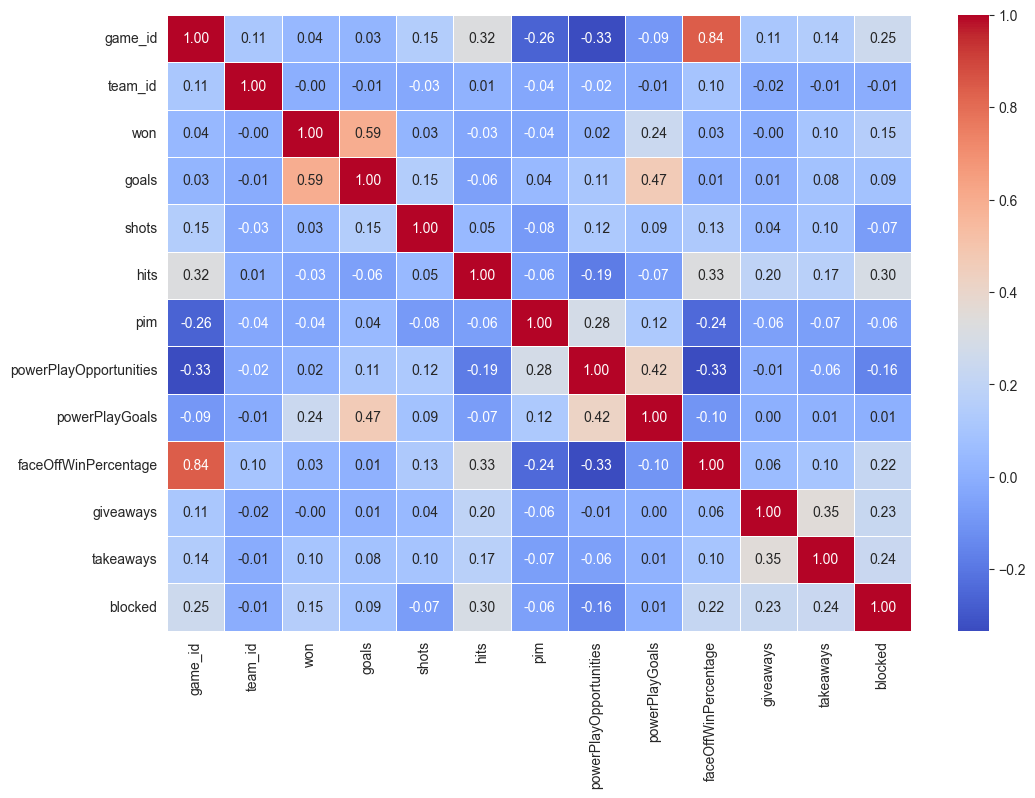

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#### Random Forest Classifier Model

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc

# Split the data into features and target
X = NHL_team_stats.drop('won', axis=1)
y = NHL_team_stats['won']

#custom train_test_split function
def get_train_valid_test_data(
        X: np.ndarray,
        y: np.ndarray,
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector
    """
    X_trn, X_tst, y_trn, y_tst = tts(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = tts(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

rfc = rfc()
rfc.fit(X_trn, y_trn)
rfc.fit(X_vld, y_vld)

y_trn_pred = rfc.predict(X_trn)
print(f'Training Accuracy: {accuracy_score(y_trn, y_trn_pred)}')
print(f'Training Classification Report:\n{classification_report(y_trn, y_trn_pred)}')

y_vld_pred = rfc.predict(X_vld)
print(f'Validation Accuracy: {accuracy_score(y_vld, y_vld_pred)}')
print(f'Validation Classification Report:\n{classification_report(y_vld, y_vld_pred)}')
y_tst_pred = rfc.predict(X_tst)

print(f'Testing Accuracy: {accuracy_score(y_tst, y_tst_pred)}')
print(f'Testing Classification Report:\n{classification_report(y_tst, y_tst_pred)}')


Training Accuracy: 0.777814373229695
Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78     15700
           1       0.77      0.78      0.77     14662

    accuracy                           0.78     30362
   macro avg       0.78      0.78      0.78     30362
weighted avg       0.78      0.78      0.78     30362

Validation Accuracy: 1.0
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3812
           1       1.00      1.00      1.00      3779

    accuracy                           1.00      7591
   macro avg       1.00      1.00      1.00      7591
weighted avg       1.00      1.00      1.00      7591

Testing Accuracy: 0.7706818421329961
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4837
           1       0.76      0.78      0.

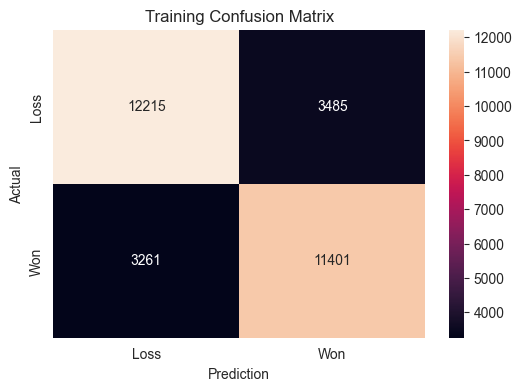

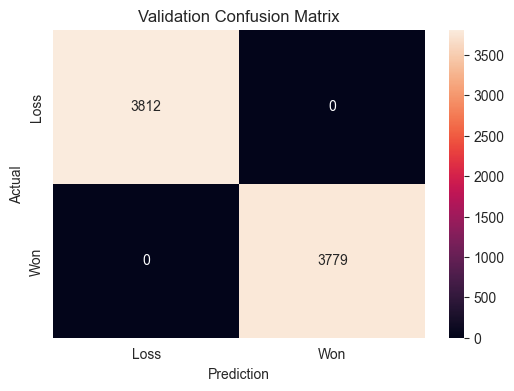

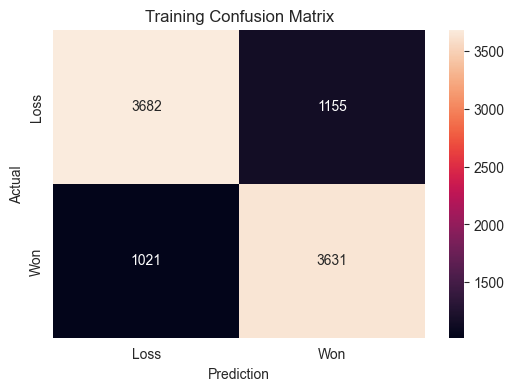

In [99]:
# Plot the confusion matrix
cm_trn = confusion_matrix(y_trn, y_trn_pred)
cm_vld = confusion_matrix(y_vld, y_vld_pred)
cm_tst = confusion_matrix(y_tst, y_tst_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_trn, annot=True, fmt="d", xticklabels=['Loss', 'Won'], yticklabels=['Loss', 'Won'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Training Confusion Matrix')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_vld, annot=True, fmt="d", xticklabels=['Loss', 'Won'], yticklabels=['Loss', 'Won'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Validation Confusion Matrix')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tst, annot=True, fmt="d", xticklabels=['Loss', 'Won'], yticklabels=['Loss', 'Won'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Training Confusion Matrix')
plt.show()

/var/folders/wd/fdt9hwyd4s399hx6l_rn_5yh0000gn/T/ipykernel_61178/1851644765.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


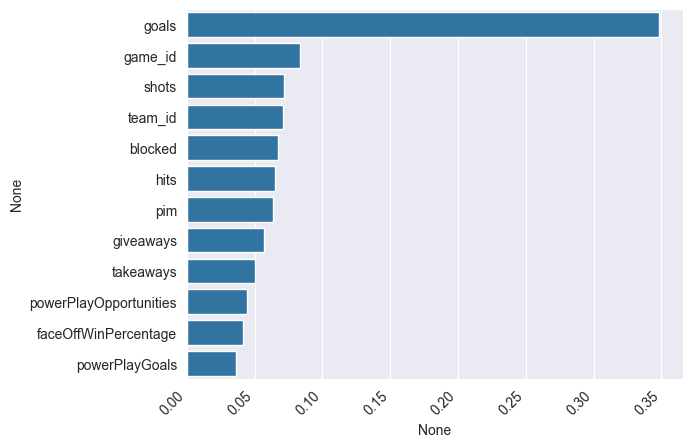

In [100]:
# Feature Importance
fi = rfc.feature_importances_
fi = pd.Series(data=fi, index=X.columns)
fi.sort_values(ascending=False, inplace=True)

chart = sns.barplot(x=fi, y=fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()